# Proyecto 1

In [1]:
#!pip install scikit-learn

In [2]:
# importar pandas numpy sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

El siguiente trabajo esta basado en el artículo Miller, C.A., Settle, S.H., Sulman, E.P. et al. Discovering functional modules by identifying recurrent and mutually exclusive mutational patterns in tumors. BMC Med Genomics 4, 34 (2011). https://doi.org/10.1186/1755-8794-4-34

En el cual desarrollaron un método para detectar automáticamente módulos funcionales en tumores basandose únicamente en patrones de aberración genómica recurrente. 

Resulta interesante debido a que los proyectos de caracterización de tumores están empezando a producir un gran volumen de datos sobre aberraciones genómicas, epigenómicas y de expresión génica en muestras tumorales. Este volumen de información sin precedentes tiene el potencial de transformar nuestra comprensión de la biología del cáncer, revelar nuevos biomarcadores y dianas farmacológicas y acelerar el desarrollo de nuevas terapias contra el cáncer.


En el artículo describe la métodología para obtener la matriz de mutación de la colección CGA de 145 muestras de glioblastoma. Para esto usaron en R el paquete DNAcopy, descargarmos algunos ejemplares en la carpeta genomica del repositorio, e intentamos ver los datos en analysis.r sin mucho exito.

Afortudamente el artículo nos comparte la matriz de mutación.

In [3]:
link_database = ' http://brl.bcm.tmc.edu/rme/gbm.dat'

# Descarga el archivo de la base de datos
import urllib.request
urllib.request.urlretrieve(link_database, 'gbm.dat')

('gbm.dat', <http.client.HTTPMessage at 0x2249905cb10>)

In [4]:
# Lee el archivo con pandas
data = pd.read_csv('gbm.dat', sep='\t')
columns = data.columns
data.describe()

,TCGA-02-0001,TCGA-02-0003,TCGA-02-0006,TCGA-02-0007,TCGA-02-0009,TCGA-02-0010,TCGA-02-0011,TCGA-02-0014,TCGA-02-0015,TCGA-02-0016,...,TCGA-08-0373,TCGA-08-0375,TCGA-08-0380,TCGA-08-0386,TCGA-08-0389,TCGA-08-0390,TCGA-12-0616,TCGA-12-0618,TCGA-12-0619,TCGA-12-0620
count,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,...,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000
mean,0.012915,0.044280,0.012915,0.083026,0.018450,0.127306,0.014760,0.062731,0.081181,0.068266,...,0.011070,0.036900,0.020295,0.007380,0.029520,0.020295,0.009225,0.018450,0.011070,0.014760
std,0.113013,0.205908,0.113013,0.276176,0.134697,0.333624,0.120703,0.242702,0.273365,0.252434,...,0.104727,0.188691,0.141138,0.085669,0.169416,0.141138,0.095692,0.134697,0.104727,0.120703
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
data.head()

,Unnamed: 0,TCGA-02-0001,TCGA-02-0003,TCGA-02-0006,TCGA-02-0007,TCGA-02-0009,TCGA-02-0010,TCGA-02-0011,TCGA-02-0014,TCGA-02-0015,...,TCGA-08-0373,TCGA-08-0375,TCGA-08-0380,TCGA-08-0386,TCGA-08-0389,TCGA-08-0390,TCGA-12-0616,TCGA-12-0618,TCGA-12-0619,TCGA-12-0620
0,ZNF708,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,XPOT,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,RNF38,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CCT2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,INSR,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Constructing a gene network with Winnow

El primer paso en nuestro proceso de detección de módulos fue filtrar la matriz de mutaciones y retener sólo los genes que cumplen una frecuencia de recurrencia establecida, ya que los genes alterados en sólo una o unas pocas muestras no contienen suficiente información para calcular puntuaciones de exclusividad significativas.

In [6]:
# dicionario {gene:num_muestras en las que esta mutado}
recurrencia_genes = dict()
# diccionario {muestra:[genes mutados]}
genes_muestras = dict()

In [7]:
for i,gene in data['Unnamed: 0'].items():
    # En las muestras verificar si este gen esta mutado
    for j in range(1,len(data.columns)):
        for sample in data.columns[j:]:
            if data[sample][i] == 1:
                #print("Gen mutado: ", gene, " en la muestra: ", sample)
                recurrencia_genes[gene] = recurrencia_genes.get(gene,0) + 1
                genes_muestras[sample] = genes_muestras.get(sample,[]) + [gene]
            break

In [8]:
# Generar un dataframe con los genes y su recurrencia
df_gen_rec = pd.DataFrame(list(recurrencia_genes.items()), columns=['Gen', 'Recurrencia'])
# Generar un dataframe con las muestras y los genes mutados
df_muestras_genes = pd.DataFrame(list(genes_muestras.items()), columns=['Muestra', 'Genes'])

In [9]:
# Crear un diccionario {muestra: [0,0,0,...]}
sample_array = {}
for fila in data.columns[1:10]:
    sample_array[fila] = data[fila].values

tmp_df = pd.DataFrame(sample_array)

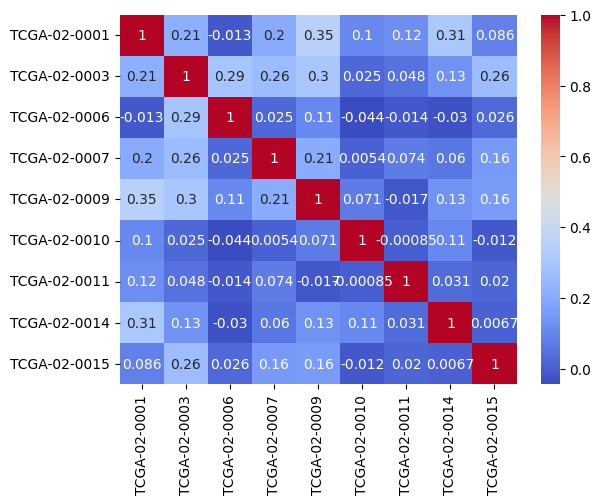

In [10]:
# Heatmap
sns.heatmap(tmp_df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [11]:
# Heatmap de los genes mutados df_muestras_genes
# Crear una matriz de 0s y 1s
matriz_genes = np.zeros((len(df_muestras_genes), len(df_gen_rec)))
for i in range(len(df_muestras_genes)):
    for j in range(len(df_gen_rec)):
        if df_gen_rec['Gen'][j] in df_muestras_genes['Genes'][i]:
            matriz_genes[i,j] = 1

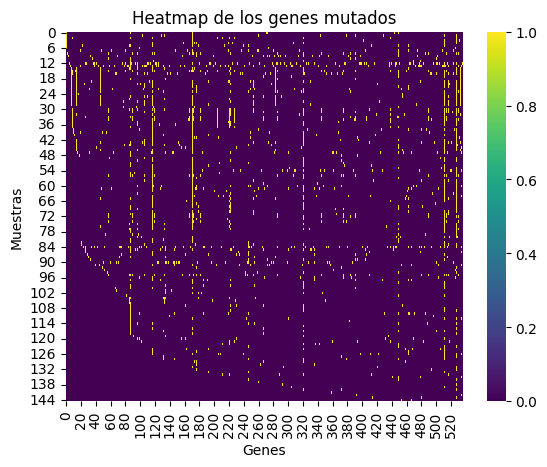

In [12]:
# Crear un heatmap
sns.heatmap(matriz_genes, cmap='viridis')
plt.xlabel('Genes')
plt.ylabel('Muestras')
plt.title('Heatmap de los genes mutados')
plt.show()

In [13]:
# Recuperar muestras 12, 84
data.columns[12]
data.columns[84]

# Contar cuantos genes mutados tienen en comun
genes_muestra_12 = set(genes_muestras[data.columns[12]])
genes_muestra_84 = set(genes_muestras[data.columns[84]])
print("Genes en comun entre las muestras 12 y 84: ", len(genes_muestra_12.intersection(genes_muestra_84)))
print(genes_muestra_12.intersection(genes_muestra_84))

# Genes mutados en la muestra 12
print("Genes mutados en la muestra 12: ", genes_muestra_12)

Genes en comun entre las muestras 12 y 84:  1
{'TARP'}
Genes mutados en la muestra 12:  {'EGFR', 'NPHP4', 'FKBP9', 'MKI67', 'NRAP', 'HIPK2', 'PRSS1', 'TARP', 'CDKN2A', 'NOS3', 'KLF6/UPF2', 'ADAM15'}


In [32]:
# Gen 230
print("Recurrencia del gen ", df_gen_rec['Gen'][320], " es: ", df_gen_rec['Recurrencia'][320])

Recurrencia del gen  chr14:44564778-44679578  es:  12


In [42]:
# Filtrar los genes que tienen una recurrencia mayor a 10
df_gen_rec[df_gen_rec['Recurrencia'] > 10].head()

,Gen,Recurrencia
7,chr6:168107192-168276703,15
9,MN1,11
14,chr6:164016427-164050128,21
20,KLF6/UPF2,60
46,RPS6KA2,18


In [44]:
# Crear heatmap de los genes que tienen una recurrencia mayor a 10
df_gen_rec_10 = df_gen_rec[df_gen_rec['Recurrencia'] > 10]
matriz_genes_10 = np.zeros((len(df_muestras_genes), len(df_gen_rec_10)))
index_df_gen_rec_10 = df_gen_rec_10.index
                           
for i in range(len(df_muestras_genes)):
    for j in index_df_gen_rec_10:
        if df_gen_rec_10['Gen'][j] in df_muestras_genes['Genes'][i]:
            matriz_genes_10[i,j] = 1

sns.heatmap(matriz_genes_10, cmap='viridis')
plt.xlabel('Genes')
plt.ylabel('Muestras')
plt.title('Heatmap de los genes mutados con recurrencia mayor a 10')
plt.show()

IndexError: index 87 is out of bounds for axis 1 with size 53